# Merian Part 3: explore your own sample


In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
from IPython.display import clear_output

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.coordinates import SkyCoord

# We can beautify our plots by changing the matpltlib setting a little
plt.rcParams['font.size'] = 18
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 90
plt.rcParams['axes.linewidth'] = 2

In [2]:
required_packages = ['statmorph', 'sep']  # Define the required packages for this notebook

import sys
import subprocess

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    # Download utils.py
    !wget -q -O /content/utils.py https://raw.githubusercontent.com/AstroJacobLi/ObsAstGreene/refs/heads/main/book/docs/utils.py
    # Function to check and install missing packages
    def install_packages(packages):
        for package in packages:
            try:
                __import__(package)
            except ImportError:
                print(f"Installing {package}...")
                subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
    # Install any missing packages
    install_packages(required_packages)
else:
    # If not in Colab, adjust the path for local development
    sys.path.append('../../../')

# Get the directory right
if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/drive/')
  os.chdir('/content/drive/Shareddrives/AST207/data')
else:
    os.chdir('../../../_static/ObsAstroData/')

## 1. Define your own Merian sample

In [13]:
cat = Table.read('./merian/cosmos_Merian_DR1_photoz_v1.0.fits')
cat = cat[cat['z_desi'] != -99.0]
cat = cat[cat['good_desi']] # ensure good DESI spec-z
cat = cat[cat['z_desi'] < 2]

zp = 31.4
for filt in ['g', 'r', 'i', 'N708', 'N540']:
    cat[f'mag_{filt}'] = zp - 2.5 * np.log10(cat[f'{filt}_gaap1p0Flux_Merian'])
z_spec = cat['z_desi']
cat['z_spec'] = z_spec

cat_inband = cat[(z_spec < 0.11) & (z_spec > 0.05) & (cat['mag_i'] < 21.5)]
cat_inband['ssfr_1p0'] = cat_inband['sfr_1p0'] - cat_inband['mass_1p0']

Text(0.5, 0, 'i-N708')

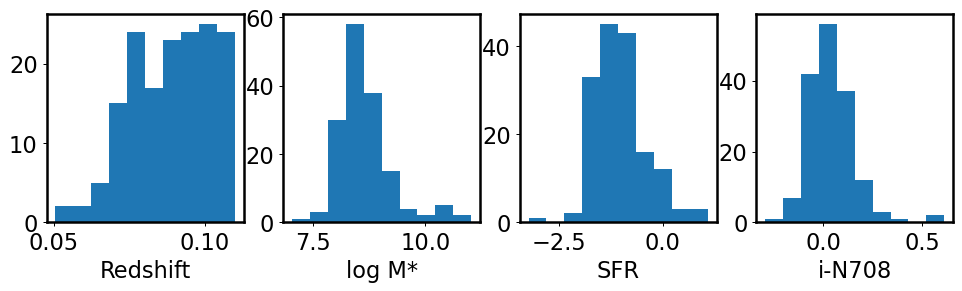

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(13, 3))
plt.sca(axes[0])
plt.hist(cat_inband['z_spec'])
plt.xlabel('Redshift')

plt.sca(axes[1])
plt.hist(cat_inband['mass_1p0'])
plt.xlabel('log M*')

plt.sca(axes[2])
plt.hist(cat_inband['sfr_1p0'])
plt.xlabel('SFR')

plt.sca(axes[3])
plt.hist(cat_inband['mag_i'] - cat_inband['mag_N708'])
plt.xlabel('i-N708')

In [ ]:
# Define your own sample here

## 2. Generate H-alpha maps for these galaxies

## 3. Measure structural parameters for these galaxies in both i-band and N708 (for majors)